In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

from textblob import TextBlob

In [62]:
tweet = pd.read_csv("Twitter_Data.csv")
tweet

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [63]:
tweet.isna().sum()

clean_text    4
category      7
dtype: int64

In [64]:
tweet.dropna(inplace=True)

In [65]:
tweet.isna().sum()

clean_text    0
category      0
dtype: int64

<Axes: xlabel='category', ylabel='count'>

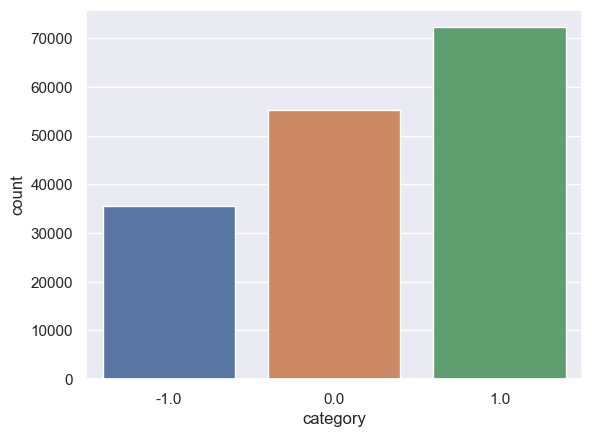

In [66]:
sns.countplot(data=tweet, x="category")

In [67]:
def processing(tweets):
    tweets = tweets.lower().strip()
    token_tweets = word_tokenize(tweets)
    filtered_tweet = [t for t in token_tweets if not t in stop_words]
    return " ".join(filtered_tweet)

In [68]:
tweet['clean_text'] = tweet['clean_text'].apply(processing)

In [69]:
tweet.shape

(162969, 2)

In [70]:
tweet.drop_duplicates(inplace=True)

In [71]:
tweet.shape

(158954, 2)

In [72]:
# stem_cut = PorterStemmer()

# def tweet_stemmer(tweets):
#     text = [stem_cut.stem(word) for word in tweets]
#     return text

In [73]:
# tweet['clean_text'] = tweet['clean_text'].apply(lambda x: tweet_stemmer(x))

In [74]:
def plolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [75]:
tweet['polarity'] = tweet['clean_text'].apply(plolarity)
tweet.head()

,clean_text,category,polarity
0,modi promised “ minimum government maximum gov...,-1.0,-0.300000
1,talk nonsense continue drama vote modi,0.0,0.000000
2,say vote modi welcome bjp told rahul main camp...,1.0,0.483333
3,asking supporters prefix chowkidar names modi ...,1.0,0.033333
4,answer among powerful world leader today trump...,1.0,0.300000


In [76]:
tweet.tail()

,clean_text,category,polarity
162975,456 crores paid neerav modi recovered congress...,-1.0,-0.291667
162976,dear rss terrorist payal gawar modi killing 10...,-1.0,-0.195833
162977,cover interaction forum left,0.0,0.000000
162978,big project came india modi dream project happ...,0.0,0.000000
162979,ever listen like gurukul discipline maintained...,1.0,0.450000


In [109]:
new_tweet = tweet.copy()

new_tweet['polarity'] = new_tweet['polarity'].apply(lambda x: -1 if x < 0 else (0 if x == 0 else 1))
new_tweet['sentiment'] = new_tweet['polarity'].apply(lambda x: "Negative" if x < 0 else ("Neutral" if x == 0 else "Positive"))

In [110]:
new_tweet

,clean_text,category,polarity,sentiment
0,modi promised “ minimum government maximum gov...,-1.0,-1,Negative
1,talk nonsense continue drama vote modi,0.0,0,Neutral
2,say vote modi welcome bjp told rahul main camp...,1.0,1,Positive
3,asking supporters prefix chowkidar names modi ...,1.0,1,Positive
4,answer among powerful world leader today trump...,1.0,1,Positive
...,...,...,...,...
162975,456 crores paid neerav modi recovered congress...,-1.0,-1,Negative
162976,dear rss terrorist payal gawar modi killing 10...,-1.0,-1,Negative
162977,cover interaction forum left,0.0,0,Neutral
162978,big project came india modi dream project happ...,0.0,0,Neutral


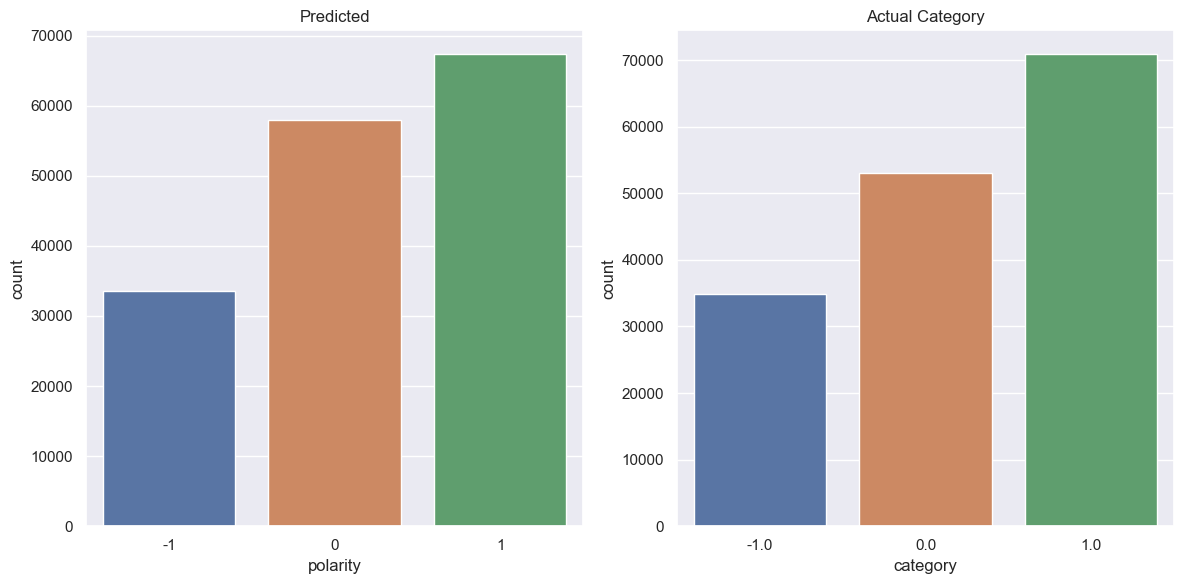

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=new_tweet, x="polarity", ax=axes[0])
axes[0].set_title('Predicted')

sns.countplot(data=new_tweet, x="category", ax=axes[1])
axes[1].set_title('Actual Category')

plt.tight_layout()
plt.show()

In [117]:
accuarcy = (new_tweet['category'] == new_tweet['polarity']).sum()/len(new_tweet.index)
print(accuarcy)

classification_distribution = new_tweet.groupby(['category', 'polarity']).size().unstack(fill_value=0)
classification_distribution

0.9399511808447727


polarity,-1,0,1
category,,,
-1.0,31123,2003,1818
0.0,244,52791,63
1.0,2255,3162,65495


In [120]:
single_tweet = input("Please input a tweet:")

df = pd.DataFrame([single_tweet], columns=['tweet'])

df['tweet'] = df['tweet'].apply(processing)

df['polarity'] = df['tweet'].apply(plolarity)

new_df = df.copy()

new_df['polarity'] = new_df['polarity'].apply(lambda x: "Negative" if x < 0 else ("Neutral" if x == 0 else "Positive"))

new_df['polarity'][0]

'Positive'